In [371]:
import numpy as np
import cv2
import imageio as io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle


#imgcv2=cv2.imread('galaxy.jpg',0)   # 1 as is    # 0  blackwhite  -1 alpha channel transparency .color image is three dimensional matrix
#img2=cv2.imread('cat.jpg',1)

#cv2.imshow('Cats',img2)
#cv2.waitKey(10000)
#cv2.destroyAllWindows()      #test of cat vizualization


#print(np.shape(img2))
#img=io.imread('galaxy.jpg')
#imageio.imshow(img)
#img3=plt.imread('cat.jpg')
#plt.imshow(img3)
#print(img2)

(768, 1366, 3)


In [373]:
count=0

label_map=['Anger','Disgust','Fear','Happy','Sad','Surprise','Neutral']
img_matrix=[]
expr=[]
img_norm_global=[]
img_vec_=[]

for line in open('fer2013_cleaned.txt'):     #file consist of 35887 entry, but 35875 not zero max of pixel non zero each entry has 1 digit for emotion then and array of 2304 pixel intensity (48*48) and 1 text for name (traning/test) not necessary here
    count=count+1
    #print(count)

        
    list_=line.replace(',',' ').split(' ')

    txt=list_[len(list_)-1]

    image_vec=np.array((list_[1:len(list_)-1]))   #list string
    image_vec_i=[int(i) for i in image_vec]   # list to integer
    
    if(len(list_)==2306 and np.max(image_vec_i)!=0):     #count to make sure 1+(48*48)+1=2306 entry is there and pixel max of each photo is not zero
        
        expr_=int(list_[0])
        expr.append(expr_)
        
        image_vec_i=np.array(image_vec_i)
        img_vec_.append(image_vec_i)
        image_vec_i_norm=np.array(image_vec_i)/np.max(image_vec_i)
        img_matrix.append(image_vec_i_norm)             #for solving
        len_N=int(np.sqrt(np.shape(image_vec_i)[0]))
        img=image_vec_i.reshape(len_N,len_N)
        img_norm=img/(np.max(img))
        #print(np.max(img))
        img_norm_global.append(img_norm)     #for plotting figs
        
        


In [374]:
np.shape(img_matrix)

(35875, 2304)

In [375]:
# check for nan#
import math
list_nan=[]
for i in range(35875):   #35887
    for j in range(2304):
        if(math.isnan(img_matrix[i][j])==True):
            print(i,j,img_matrix[i][j])
            list_nan.append(i)
        

In [376]:
np.max(img_matrix)   #after taking out 0.0 maxes matrix size dropped 35887 to 35875

1.0

In [378]:
#emotion labels
for i in range(7):
    #new=expr%i
    
    print(i,expr.count(i),label_map[i])


0 4945 Anger
1 547 Disgust
2 5121 Fear
3 8988 Happy
4 6076 Sad
5 4001 Surprise
6 6197 Neutral


In [380]:

N=np.shape(img_matrix)[0]
D=np.shape(img_matrix)[1]

YY=np.random.randn(N)
XX=np.zeros((N,D))

        
for i in range(N):
    YY[i]=expr[i]    #expressions
    for j in range(D):
                
        XX[i,j]=img_matrix[i][j]     #pixels into XX
 
       


In [381]:
X=XX[(YY==3.0) | (YY==4.0)]    #only get emotions 3 happy and 4 sad
Y=YY[(YY==3.0) | (YY==4.0)]
Y=np.round(abs(np.remainder(Y,3)-1.0))    #set emotion sad to zero and happy to one for logical regression
#Y=int(np.abs(Y%3-1))

In [559]:
Y

array([0., 0., 1., ..., 1., 1., 1.])

In [558]:
mat_x=np.matrix(X)
mat_y=np.matrix(Y)

with open('X_matrix_image_clean.txt','wb') as r:                #  15064 line * 2304 
    for line in mat_x:
        np.savetxt(r,line,fmt='%.4f')
        
with open('Y_matrix_image_clean.txt','wb') as q:                 #one array 15064 all in one line 
    for line in mat_y:
        np.savetxt(q,line,fmt='%.1f')        

In [382]:
np.shape(Y)

(15064,)

In [383]:
np.shape(X)

(15064, 2304)

[27209 34921  7507  8340 32044 31152  8590 18143  9674  5470]


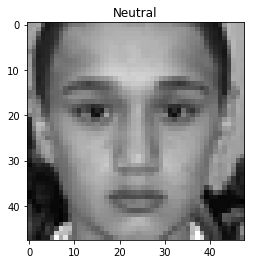

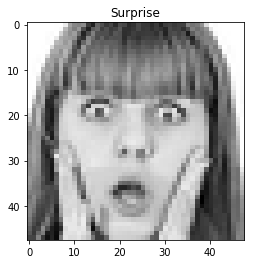

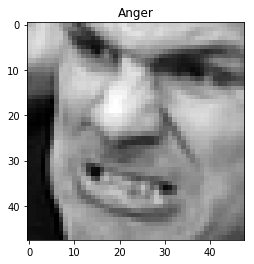

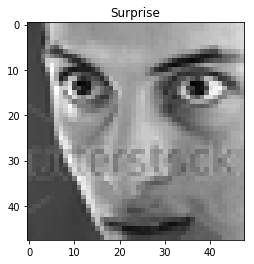

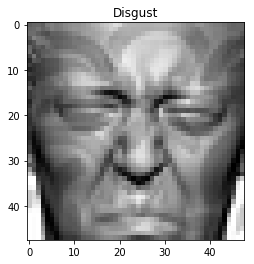

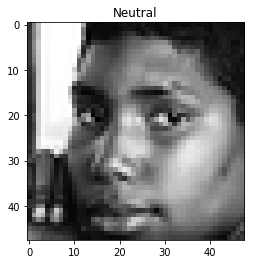

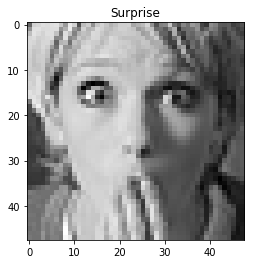

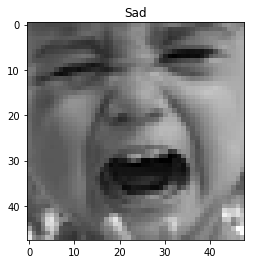

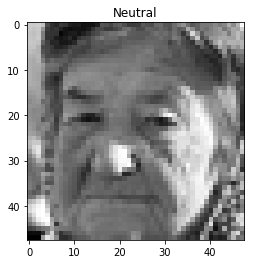

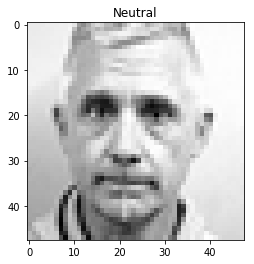

In [545]:
#random sample plotting
N_samples=np.shape(expr)[0]

picks=np.random.choice(N_samples, 10)
print(picks)
for i in picks:
    plt.figure(figsize=(4,4))
    plt.imshow(img_norm_global[i],cmap='gray')
    plt.title(label_map[expr[i]])
    plt.show()

In [387]:
print(np.shape(XX))
print(np.max(img_matrix))

(35875, 2304)
1.0


In [546]:
import sys
del sys.modules["essential_logistic"]  #remove import of main library of my functions if in sys to enable modificication and reloading

In [538]:

from essential_logistic import *    #import essential set of library for gradient descent.jost,...

#w_restart=w
#w_mag_restart=w_mag
#j_cost_restart=j_cost        

flag_restart=1
#get_restart_values(j_cost_restart,w_mag_restart,j_cost_restart)

Xtrain,Ytrain,Xtest,Ytest=shuffle_divide(X,Y,ratio=0.3)

j_cost,w_mag,w,Y_n=gradient_descent(Xtrain,Ytrain,flag_restart,j_cost_restart,w_mag_restart,w_restart)

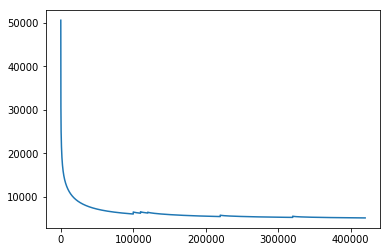

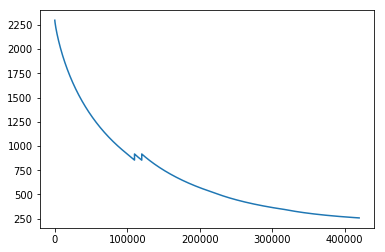

In [544]:
plotting(j_cost,w_mag)

In [540]:
Y_train_p=y_cal_z(Xtrain,w)
accuracy_rate(Y_train_p,Ytrain)
Y_test_p=y_cal_z(Xtest,w)
accuracy_rate(Y_test_p,Ytest)

Assume 1 is True for Actual data, False is 0
Classificatio rate : 0.7668089141773352
----------------------------------------------------------
5356 1525
934 2730
--------------
TPR= 0.851510333863275 FPR= 0.3584018801410106
FNR= 0.14848966613672496 TNR= 0.6415981198589894
--------------
ROC=TPR/FPR 2.3758534233365474
ROC2=TNR/FNR 4.320826738664929
--------------
Recall= 0.851510333863275 precision= 0.7783752361575352 F1_score= 0.8133019512565484




Assume 1 is True for Actual data, False is 0
Classificatio rate : 0.6977207346758132
----------------------------------------------------------
2134 802
564 1019
--------------
TPR= 0.7909562638991846 FPR= 0.4404173531026908
FNR= 0.20904373610081542 TNR= 0.5595826468973092
--------------
ROC=TPR/FPR 1.7959243847386723
ROC2=TNR/FNR 2.676868761221525
--------------
Recall= 0.7909562638991846 precision= 0.7268392370572208 F1_score= 0.7575434859779909






In [541]:
flag_restart=1
w_restart=w
w_mag_restart=w_mag
j_cost_restart=j_cost

#keep a copy in restart variables in memory

In [542]:
flag_restart=1
w_backup=w_restart
w_mag_backup=w_mag_restart
j_cost_backup=j_cost_restart
#keep a copy inbackup variables in memory just in case

In [543]:
#write results in restart file

f= open("restart_wmag2.txt","w")

for i in range(len(w_mag_restart)):
    f.write(str(w_mag[i])+'\n')
f.close()

g= open("restart_w2.txt","w")

for i in range(len(w)):
    g.write(str(w[i])+'\n')
g.close()

h= open("restart_j_cost2.txt","w")

for i in range(len(j_cost)):
    h.write(str(j_cost[i])+'\n')
h.close()  

[7917 9881  966 5406 7731 1632 5747 7993 5368  630]
result Happy


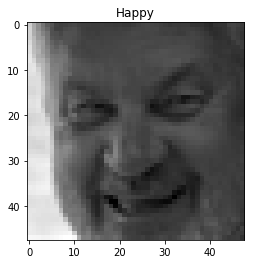

result Happy


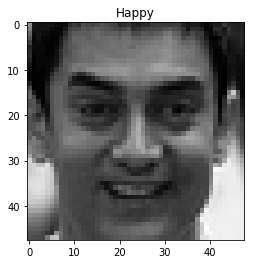

result Happy


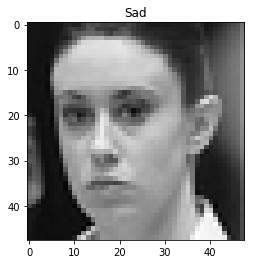

result Happy


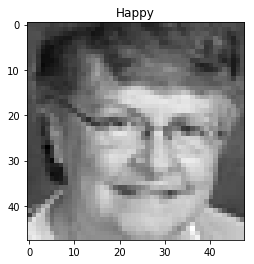

result Sad


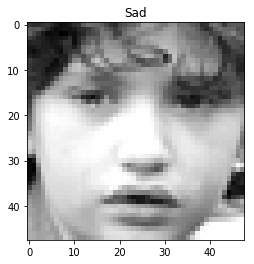

result Happy


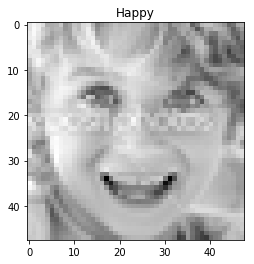

result Happy


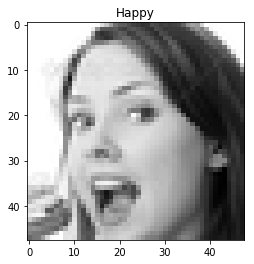

result Sad


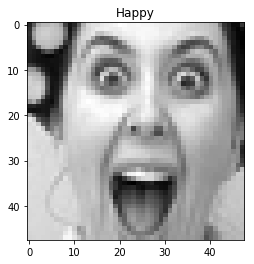

result Happy


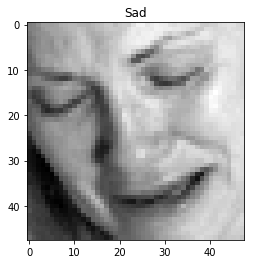

result Sad


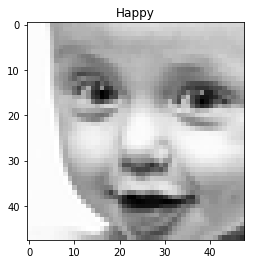

In [550]:
#plot the predition of training

label_map2=['Sad','Happy']

#img2=Xtrain.reshape(int(np.sqrt(np.shape(Xtrain))),int(np.sqrt(np.shape(Xtrain))))
#plt.imshow(img2,cmap='gray')
#plt.title(label_map2[Ytrain[i]])
#plt.show()
temp=np.array([0]*2304)
N_samples=np.shape(Ytrain)[0]

picks=np.random.choice(N_samples, 10)
print(picks)
for i in picks:
    plt.figure(figsize=(4,4))
    temp=Xtrain[i,:]
    img2=temp.reshape(48,48)
    plt.imshow(img2,cmap='gray')
    plt.title(label_map2[int(np.round(Ytrain[i]))])
    print('result',label_map2[int(np.round(Y_train_p[i]))])
    plt.show()